In [1]:
import pandas as pd
from tqdm import tqdm

import emoji

import numpy as np

In [2]:
df = pd.read_csv('../Data/text_emotion.csv')

## Classes

In [3]:
classes = sorted(list(set(df['sentiment'])))
no_classes = len(classes)

## Pre-processing

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re

In [6]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                   "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" } 

In [7]:
import codecs
import unidecode
import re
import spacy
nlp = spacy.load('en')

def spacy_cleaner(text):
    try:
        decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
    except:
        decoded = unidecode.unidecode(text)
    apostrophe_handled = re.sub("’", "'", decoded)
    expanded = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in apostrophe_handled.split(" ")])
    parsed = nlp(expanded)
    final_tokens = []
    for t in parsed:
        if t.is_punct or t.is_space or t.like_num or t.like_url or str(t).startswith('@'):
            pass
        else:
            if t.lemma_ == '-PRON-':
                final_tokens.append(str(t))
            else:
                sc_removed = re.sub("[^a-zA-Z]", '', str(t.lemma_))
                if len(sc_removed) > 1:
                    final_tokens.append(sc_removed)
    joined = ' '.join(final_tokens)
    spell_corrected = re.sub(r'(.)\1+', r'\1\1', joined)
    return spell_corrected

In [8]:
def clean_text(data):
    data = (re.sub(r"(#[\d\w\.]+)", '', data)).lower()
    data = emoji.demojize(data)
    data = spacy_cleaner(data)
    return data

In [9]:
df['text'] = df['content'].apply(clean_text)

<ipython-input-7-7d9fec89b443>:9: DeprecationWarning: invalid escape sequence '\ '
  decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
<ipython-input-7-7d9fec89b443>:9: DeprecationWarning: invalid escape sequence '\l'
  decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
<ipython-input-7-7d9fec89b443>:9: DeprecationWarning: invalid escape sequence '\|'
  decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
<ipython-input-7-7d9fec89b443>:9: DeprecationWarning: invalid escape sequence '\m'
  decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
<ipython-input-7-7d9fec89b443>:9: DeprecationWarning: invalid escape sequence '\/'
  decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
<ipython-input-7-7d9fec89b443>:9: DeprecationWarning: invalid escape sequence '\o'
  decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
<ipython-input-7-7d9fec89b443>:9: DeprecationWarning: invalid escape sequenc

In [10]:
class_mapping = {}
for idx, name in enumerate(classes):
    class_mapping[name] = idx 

In [11]:
_ = df.pop('tweet_id')
_ = df.pop('author')

In [12]:
df['label'] = df['sentiment'].apply(lambda x : class_mapping[x])

In [13]:
class_weight = {}
for i in range(no_classes):
    num = len(df[df['label'] == i])
    class_weight[i] = num / len(df) 

### Train - Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
def build_dataset(df, feature='text', target='label'):
    dataset = (
                tf.data.Dataset.from_tensor_slices(
                    (
                        tf.cast(df[feature].values, tf.string),
                        tf.cast(df[target].values, tf.int32)
                    )
                )
            )
    return dataset

In [16]:
df_train, df_test = train_test_split(df, test_size = 0.2)
df_train, df_val = train_test_split(df_train, test_size = 0.2)

train_dataset = build_dataset(df_train)
val_dataset = build_dataset(df_val)
test_dataset = build_dataset(df_test)

In [17]:
BUFFER_SIZE = 10000
BATCH_SIZE = 128

In [18]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [19]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [20]:
model = tf.keras.Sequential([
    encoder,
    
    tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),
                              output_dim=64, mask_zero=True),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(no_classes)
])

In [21]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  verbose=1,patience=10,
                                                  mode='max', restore_best_weights=True)

In [23]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [24]:
history = model.fit(train_dataset, epochs = 20,
                    validation_data=val_dataset,
                    validation_steps=30,
                    class_weight = class_weight)

Epoch 1/20
200/200 [==============================] - 43s 139ms/step - loss: 0.2522 - accuracy: 0.2343 - val_loss: 2.2634 - val_accuracy: 0.2419
Epoch 2/20
200/200 [==============================] - 24s 118ms/step - loss: 0.2191 - accuracy: 0.3024 - val_loss: 2.0953 - val_accuracy: 0.3417
Epoch 3/20
200/200 [==============================] - 25s 124ms/step - loss: 0.2094 - accuracy: 0.3349 - val_loss: 2.1137 - val_accuracy: 0.3305
Epoch 4/20
200/200 [==============================] - 27s 136ms/step - loss: 0.2055 - accuracy: 0.3511 - val_loss: 2.0932 - val_accuracy: 0.3479
Epoch 5/20
200/200 [==============================] - 27s 135ms/step - loss: 0.2025 - accuracy: 0.3615 - val_loss: 2.0335 - val_accuracy: 0.3560
Epoch 6/20
200/200 [==============================] - 29s 143ms/step - loss: 0.1998 - accuracy: 0.3698 - val_loss: 2.1217 - val_accuracy: 0.3490
Epoch 7/20
200/200 [==============================] - 29s 144ms/step - loss: 0.1971 - accuracy: 0.3783 - val_loss: 2.1241 - val_ac

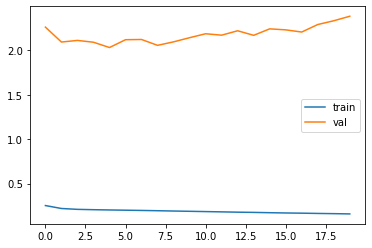

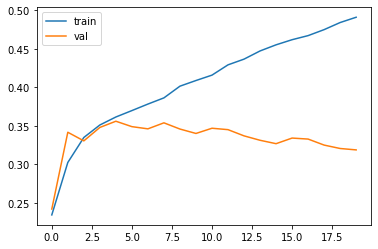

In [25]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

## Evaluate it against test

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
model.evaluate(test_dataset)

63/63 [==============================] - 3s 44ms/step - loss: 2.4043 - accuracy: 0.3156


[2.404327630996704, 0.31562501192092896]

In [28]:
pred = model.predict(test_dataset)
y_test = list(df_test.label)

In [29]:
import numpy as np

pred_idx = []
target_idx = []

for i in tqdm(range(len(pred))):
    pred_idx.append(np.argmax(pred[i]))
    target_idx.append(y_test[i])

100%|██████████████████████████████████████████████████████████████████████████| 8000/8000 [00:00<00:00, 181840.23it/s]


In [30]:
print(classification_report(target_idx, pred_idx, target_names=classes))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        26
     boredom       0.00      0.00      0.00        37
       empty       0.00      0.00      0.00       160
  enthusiasm       0.00      0.00      0.00       154
         fun       0.00      0.00      0.00       356
   happiness       0.28      0.40      0.33       989
        hate       0.00      0.00      0.00       241
        love       0.49      0.31      0.38       781
     neutral       0.31      0.50      0.38      1738
      relief       0.00      0.00      0.00       316
     sadness       0.32      0.24      0.27      1033
    surprise       0.00      0.00      0.00       441
       worry       0.31      0.44      0.37      1728

    accuracy                           0.32      8000
   macro avg       0.13      0.15      0.13      8000
weighted avg       0.26      0.32      0.27      8000



C:\Users\soham\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soham\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soham\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(confusion_matrix(target_idx, pred_idx))

[[  0   0   0   0   0   4   0   0   9   0   5   0   8]
 [  0   0   0   0   0   2   0   0  13   0   9   0  13]
 [  0   0   0   0   0  18   0   3  79   0   8   0  52]
 [  0   0   0   0   0  35   0   4  57   0  10   0  48]
 [  0   0   0   0   0 135   0   9 127   0  14   0  71]
 [  0   0   0   0   0 400   0  77 292   0  28   0 192]
 [  0   0   0   0   0  17   0   3  66   0  50   0 105]
 [  0   0   0   0   0 208   0 245 190   0  45   0  93]
 [  0   0   0   0   0 227   0  62 866   0  82   0 501]
 [  0   0   0   0   0  79   0  13 114   0  21   0  89]
 [  0   0   0   0   0  92   0  14 290   0 246   0 391]
 [  0   0   0   0   0  87   0  29 155   0  33   0 137]
 [  0   0   0   0   0 150   0  37 554   0 219   0 768]]


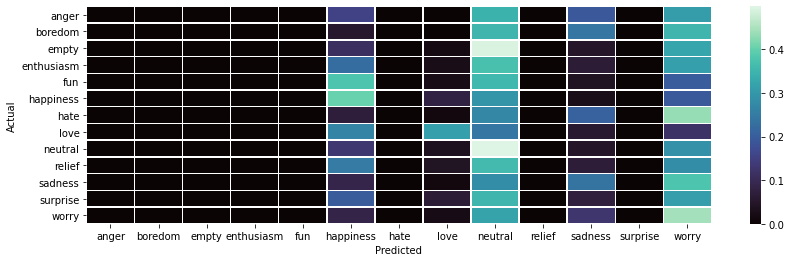

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(target_idx, pred_idx)
# Normalise
cmn = cm.astype('float')
fig, ax = plt.subplots(figsize=(14,4))
sns.heatmap(cmn/cm.sum(axis=1)[:, np.newaxis], fmt='.2f', xticklabels=classes, yticklabels=classes, cmap="mako", linewidths=.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()